**INFO AIDTECH INTERNSHIP - AUGUST 2023**\
**NINAD NILESH SUGANDHI**\
**TASK 1 - IRIS CLASSIFICATION**

Importing all necessary libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import sklearn
import matplotlib
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
import pickle

Printing the current version of all libraries used

In [2]:
print('''Pandas version is: {0}
Numpy version is: {1}
Scipy version is: {2}
Matplotlib version is: {3}
Seaborn version is: {4}
Scikit-learn version is: {5}'''.format(pd.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__, sklearn.__version__))

Pandas version is: 1.5.3
Numpy version is: 1.23.5
Scipy version is: 1.10.0
Matplotlib version is: 3.7.0
Seaborn version is: 0.12.2
Scikit-learn version is: 1.2.1


**Loading Data**\
*Printing first 5 entries of data*

In [3]:
columns = ['sepal length', 'sepal width', 'Petal length', 'Petal width', 'Class_labels']    #setting column names
data1 = pd.read_csv('D:\\NINAD SUGANDHI\\GOOGLE COLAB\\INFO AIDTECH PROJECTS\\IRIS.csv')     #loads data, comma seperated files
data1.head()     #shows first 5 rows from the datset table

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Preprocessing**

In [4]:
data1.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data1.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
type(data1)

pandas.core.frame.DataFrame

In [7]:
data1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data1.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
data1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
data1.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
data1.shape

(150, 5)

In [13]:
data1.index

RangeIndex(start=0, stop=150, step=1)

**Splitting Data for training and testing the dataset**

In [14]:
X = data1.drop('species', axis = 1)
y = data1['species']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42,stratify=y)

In [15]:
print('''Types of X_train:{0}
X_test:{1}
y_train:{2}
y_test:{3}'''.format(type(X_train), type(X_test), type(y_train), type(y_test)))

Types of X_train:<class 'pandas.core.frame.DataFrame'>
X_test:<class 'pandas.core.frame.DataFrame'>
y_train:<class 'pandas.core.series.Series'>
y_test:<class 'pandas.core.series.Series'>


In [16]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

**Data Visualizations**\
*Several Techniques used for visualizations are:*\
Pair Plot using scatter matrix trained by label encoder and data columns which classifies as per the species\
Countplot which describes the distribution of number of Iris flowers as per the Sepal Width, Sepal Length, Petal Width and Petal Length

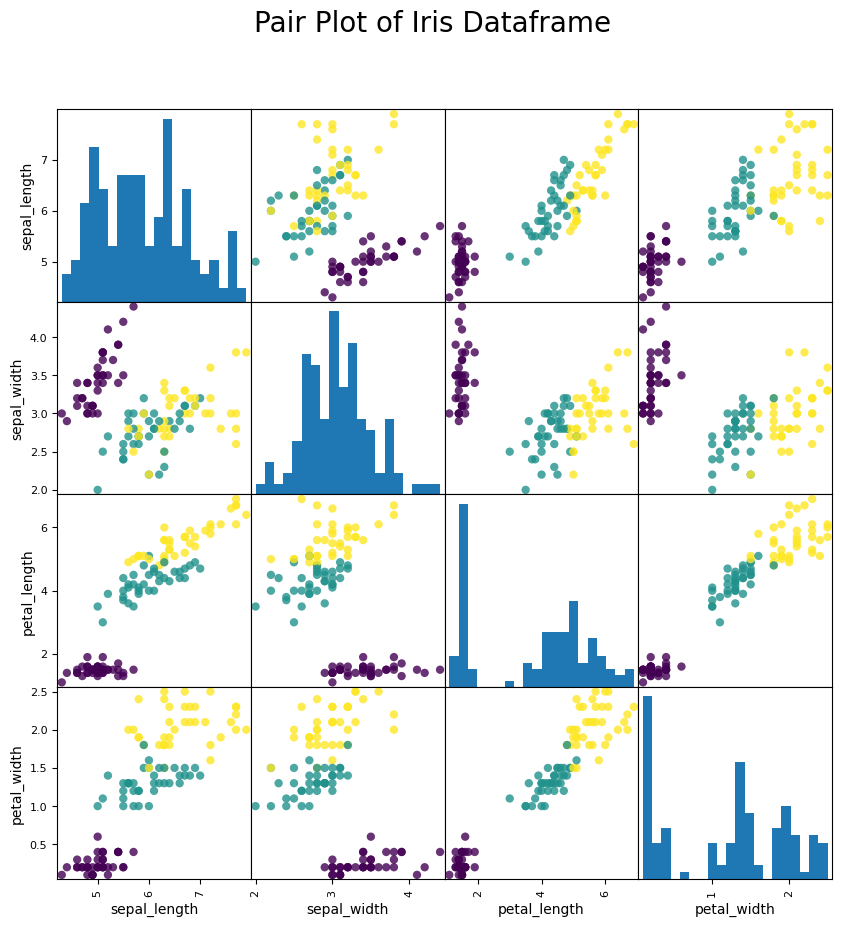

In [17]:
# Convert species names to numerical labels
label_encoder = LabelEncoder()
y_train_labels = label_encoder.fit_transform(y_train)

iris_dataframe = pd.DataFrame(data=X_train, columns=X_train.columns)
iris_sm = scatter_matrix(iris_dataframe, c=y_train_labels, figsize=(10, 10), alpha=0.8, marker='o', hist_kwds={'bins': 20})
plt.suptitle("Pair Plot of Iris Dataframe", size=20)
plt.show()

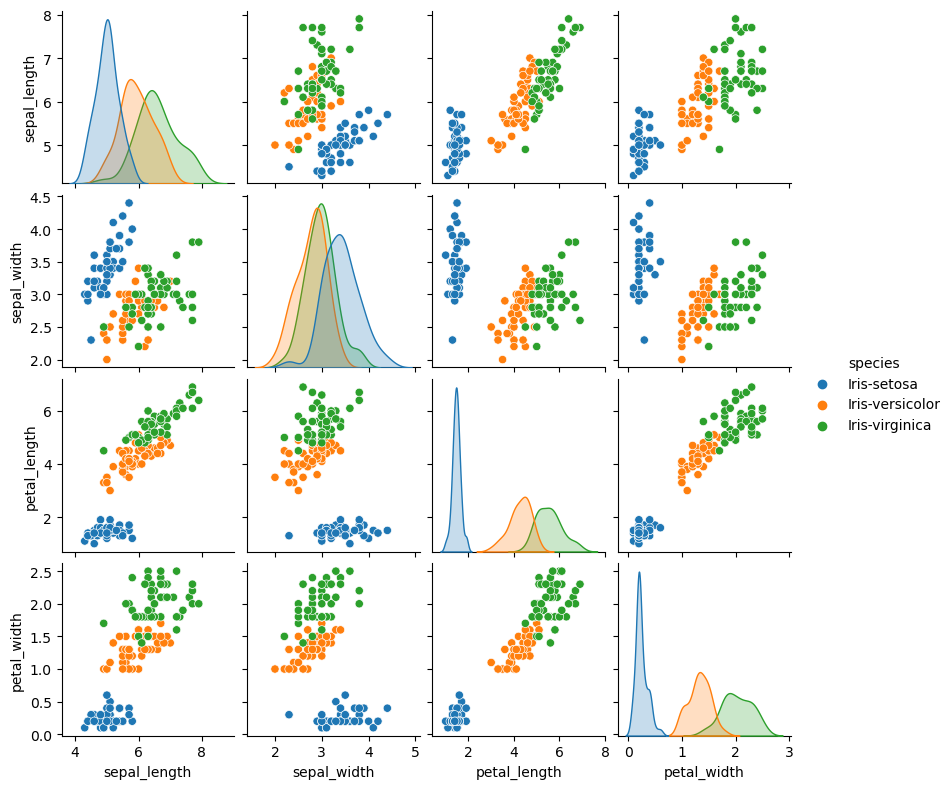

In [18]:
x_vars = list(data1.select_dtypes(include='number').columns)
y_vars = list(data1.select_dtypes(include='number').columns)
sns.pairplot(data1, hue = 'species', x_vars = x_vars, y_vars = y_vars, height = 2)

In [19]:
print("Keys of iris_dataset are:\n{}".format(data1.keys()))

Keys of iris_dataset are:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


Text(0, 0.5, 'Frequency')

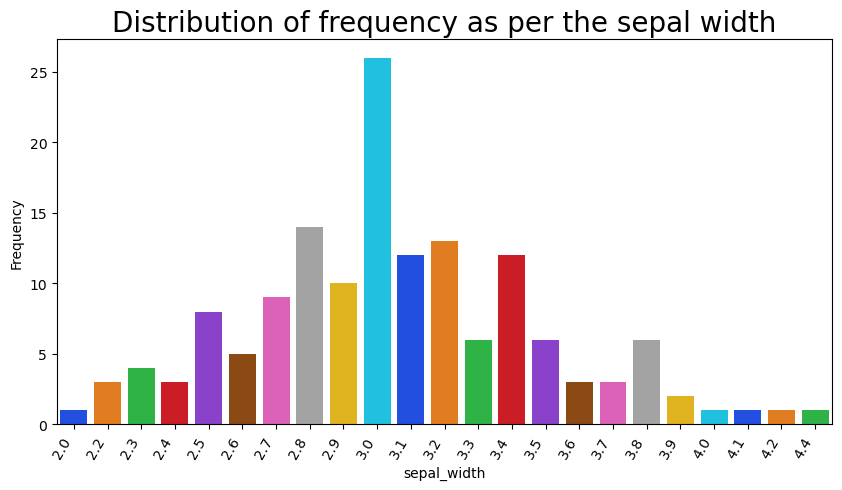

In [48]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='sepal_width',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the sepal width',size=20)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

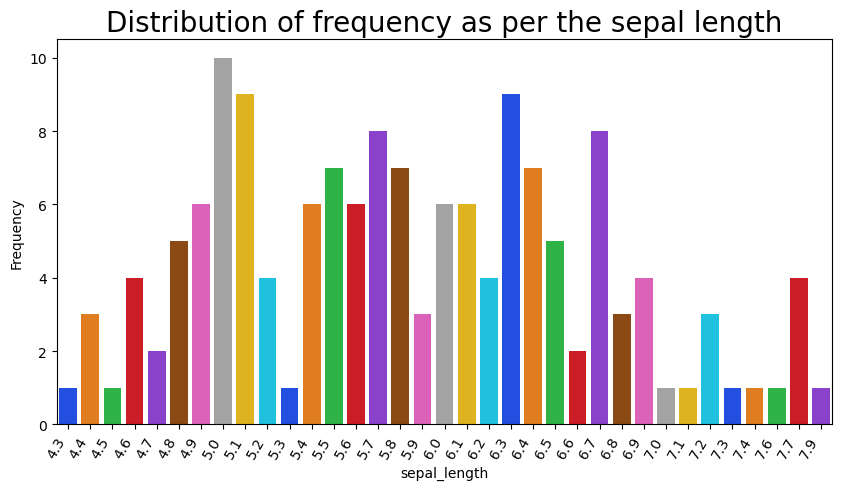

In [49]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='sepal_length',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the sepal length',size=20)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

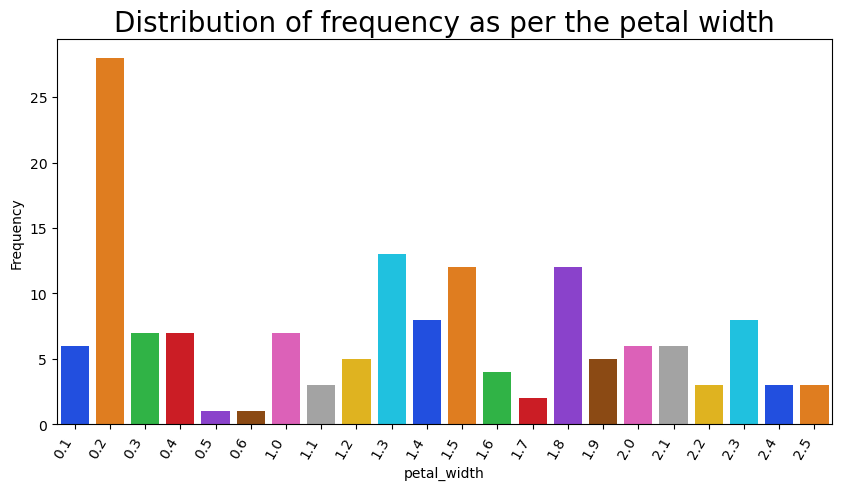

In [50]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='petal_width',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the petal width',size=20)
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

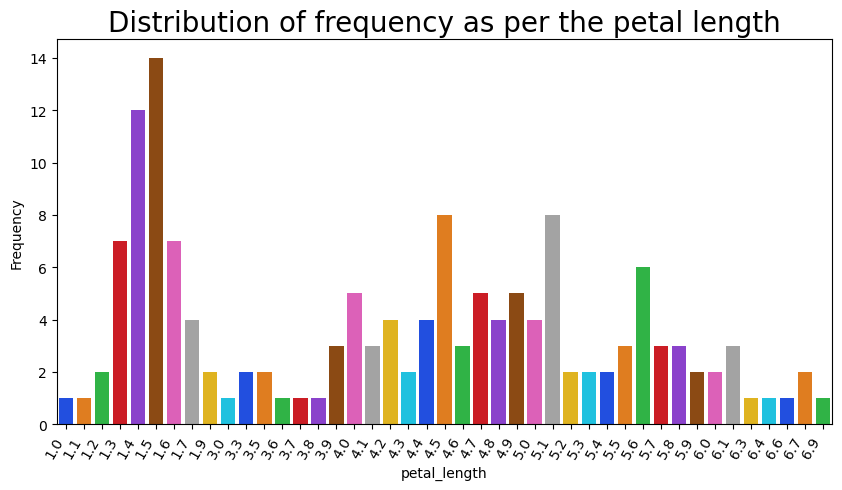

In [51]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='petal_length',data=data1,palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.title('Distribution of frequency as per the petal length',size=20)
plt.ylabel('Frequency')

**Training the KNN model**\
*Displays the accuracy and confusion matrix of the KNN model*\
*Heat map of the confusion matrix is also displayed for better visualization*

Score:
0.9210526315789473
Accuracy:
92.11


Text(58.222222222222214, 0.5, 'Truth')

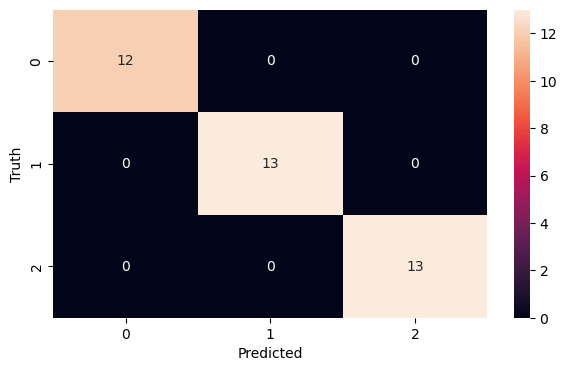

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of 'n_neighbors' for different k values

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
score = accuracy_score(y_test, y_pred)

print('''Score:\n{0}
Accuracy:\n{1}'''.format(score, round(score*100,2)))
cm = confusion_matrix(y_test, y_test)
cm
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Training the Random Forest Classifier Model**\
*Displays the accuracy and confusion matrix of the Random Forest Classifier model*\
*Heat map of the confusion matrix is also displayed for better visualization*

The accuracy of the Random Forest Classifier is:  89.47 %
[[12  0  0]
 [ 0 12  1]
 [ 0  3 10]]


Text(58.222222222222214, 0.5, 'Truth')

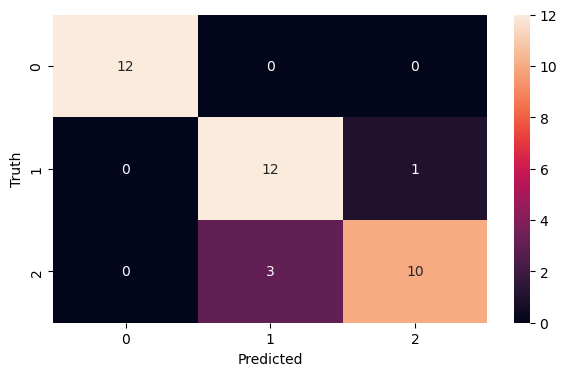

In [54]:
forest=RandomForestClassifier(n_estimators=20,criterion="gini")
forest.fit(X_train,y_train)
print("The accuracy of the Random Forest Classifier is: ", round(forest.score(X_test,y_test)*100, 2), "%")  #Prints the accuracy of the model
Y_predicted=forest.predict(X_test)  #Prediction for the new data
cm = confusion_matrix(y_test, Y_predicted)
print(cm)
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Training the SVC model using X_train and y_train variables and predicts using X_test variable**\
*Displays the accuracy of the SVM model and generates a classification report of the model*\
*Also presents a classification report of the model accompanied with confusion matrix*\
*Heat map of the confusion matrix is also displayed for better visualization*

The score is:  0.9473684210526315
The accuracy of the model trained by the SVM is:  94.74
The classification report of the given data is denoted as: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38

[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]
Prediction of Species: ['Iris-virginica' 'Iris-virginica' 'Iris-versicolor']


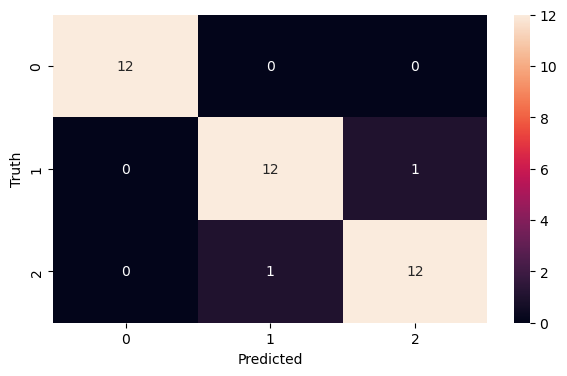

In [53]:
svn = SVC()
svn.fit(X_train, y_train)
predictions = svn.predict(X_test)
# Calculate the accuracy
score = accuracy_score(y_test, predictions)
accuracy = round(score*100,2)
print("The score is: ", score)
print("The accuracy of the model trained by the SVM is: ", accuracy)
#Print the Clasification Report
print("The classification report of the given data is denoted as: \n", classification_report(y_test, predictions))
#Get a new data and test the prediction as per the data
cm_svm = confusion_matrix(y_test, predictions)
print(cm_svm)
plt.figure(figsize = (7,4))
sns.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
X_new = np.array([[3, 1.6, 1, 0.2], [  4.7, 2.6, 3.2, 1.6 ], [  7.1, 2.7, 2.2, 1.1 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))


**📊 Project Conclusion: 🌼**\

*In this project, I embarked on a captivating journey into the realm of data classification using the Iris flower dataset. Leveraging the power of K-Nearest Neighbors (KNN), Random Forest Classifier, and Support Vector Classifier, I achieved remarkable accuracy rates:*\

KNN Model Accuracy: 92.11%\
Random Forest Classifier Accuracy: 89.47%\
Support Vector Classifier Accuracy: 94.73%\
Each model demonstrated its unique strengths, contributing to the precision and reliability of our predictions. This project not only deepened our understanding of classification techniques but also unveiled the potential of data-driven insights in deciphering the world of flora. 🌿🌸